In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
train=pd.read_csv(r"C:\Users\AKANKSHA\OneDrive\Desktop\corona_tested_individuals_ver_0083.english.csv\corona_tested_individuals_ver_0083.english.csv")

C:\Users\AKANKSHA\AppData\Local\Temp/ipykernel_23880/4049514429.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv(r"C:\Users\AKANKSHA\OneDrive\Desktop\corona_tested_individuals_ver_0083.english.csv\corona_tested_individuals_ver_0083.english.csv")


In [37]:
train.shape

(2742596, 10)

In [38]:
train.head(2)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [40]:
train['corona_result'].value_counts()

negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

In [41]:
train['gender'].value_counts()

female    1371444
male      1278266
Name: gender, dtype: int64

In [42]:
train.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [43]:
list=train.loc[(train['corona_result']=="other")].index


In [44]:
train=train.drop(list)

In [45]:
train["corona_result"].value_counts()

negative    2480403
positive     220975
Name: corona_result, dtype: int64

In [46]:
train.drop(columns=['age_60_and_above'], inplace=True)

In [47]:
train.isnull().sum()

test_date                  0
cough                      0
fever                      0
sore_throat                0
shortness_of_breath        0
head_ache                  0
corona_result              0
gender                 91189
test_indication            0
dtype: int64

In [48]:
from random import choice
mask=train['gender'].isna()
train.loc[mask,['gender']]=train.loc[mask,['gender']].applymap(lambda _: choice(['male','female']))

In [49]:
train.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
gender                 0
test_indication        0
dtype: int64

In [50]:
train.groupby("test_indication").mean()

,cough,fever,sore_throat,shortness_of_breath,head_ache
test_indication,,,,,
Abroad,0.707073,0.319466,0.026706,0.015397,0.024035
Contact with confirmed,0.219750,0.226758,0.099274,0.031004,0.201439
Other,0.022322,0.019903,0.004929,0.002101,0.009851


In [54]:
train['gender']=pd.get_dummies(train['gender'],drop_first=1)

In [56]:
train['corona_result']=pd.get_dummies(train['corona_result'],drop_first=1)

In [57]:
train.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,2020-11-12,0,0,0,0,0,0,1,Other
1,2020-11-12,0,1,0,0,0,0,1,Other
2,2020-11-12,0,0,0,0,0,0,0,Other
3,2020-11-12,0,0,0,0,0,0,1,Other
4,2020-11-12,0,1,0,0,0,0,1,Contact with confirmed


In [60]:
train.groupby("test_indication").mean()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender
test_indication,,,,,,,
Abroad,0.707073,0.319466,0.026706,0.015397,0.024035,0.083413,0.539286
Contact with confirmed,0.219750,0.226758,0.099274,0.031004,0.201439,0.591023,0.486881
Other,0.022322,0.019903,0.004929,0.002101,0.009851,0.048041,0.482132


In [61]:
train['test_indication'].value_counts()


Other                     2511015
Contact with confirmed     166398
Abroad                      23965
Name: test_indication, dtype: int64

In [65]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X= train[["cough","fever","sore_throat","shortness_of_breath","head_ache","gender"]]
y=train["corona_result"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
clf = DecisionTreeClassifier()

In [68]:
clf = clf.fit(X_train,y_train)

In [69]:

y_pred = clf.predict(X_test)

In [70]:
metrics.accuracy_score(y_test, y_pred)

0.9304799769006952

c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='corona_result', ylabel='Density'>

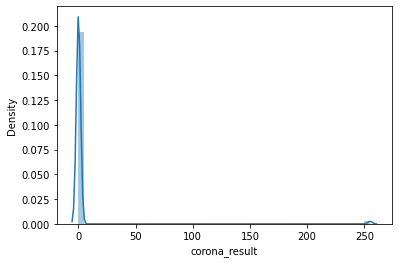

In [74]:
sns.distplot((y_test-y_pred),bins=50)

In [76]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

RMSE: 0.26366649976685474
MAE: 14.594032186018504
MSE: 0.0695200230993048


In [77]:
import pickle

In [78]:
with open('clf_pkl', 'wb') as files:
    pickle.dump(clf, files)

In [79]:
with open('clf_pkl' , 'rb') as f:
    lr = pickle.load(f)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,2020-11-12,0,0,0,0,0,0,1,Other
1,2020-11-12,0,1,0,0,0,0,1,Other
2,2020-11-12,0,0,0,0,0,0,0,Other
3,2020-11-12,0,0,0,0,0,0,1,Other
4,2020-11-12,0,1,0,0,0,0,1,Contact with confirmed
